# Assignment 11: CUSUM Charts (n=1)
Sydney Perrin

March 31st, 2022

## Import Packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

## Import Data

In [2]:
df=pd.read_csv('11 data.csv')
#df.head(100)

,Measurement,Temperature
0,1,953
1,2,945
2,3,972
3,4,980
4,5,975
5,6,970
6,7,959
7,8,973
8,9,940
9,10,936


## 1. Eighty measurements of the temperature reading from a chemical process in °C are presented in the dataset. One measurement is taken every two minutes. The target value for the mean is 950. Set up MR and I charts. Is the process in control?

### Check for Normality

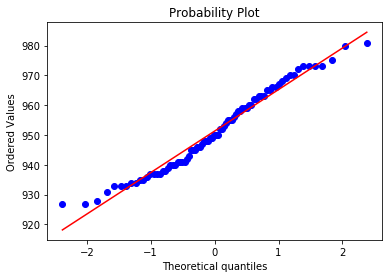

(0.9691793918609619, 0.05031641572713852)


In [3]:
x=df['Temperature']

# Graphic test
stat.probplot(x, plot=plt)
plt.show() 

# Stats tests
t1=stat.shapiro(x)
t2=stat.normaltest(x)
print(t1) # Use Shapiro test results
#print(t2)

# Normally distributed because p>0.05. Do not need to normalize by taking log(x).

### Moving Range (MR) Calculations

In [4]:
m=80 # Number of samples
n=1 # Sample size

MR = (m-1)*[None]
for i in range(m-1):
    MR[i]=np.abs(x[i+1]-x[i])

# MR control chart constants for n=2
A2=1.880
d2=1.128
D4=3.267
D3=0

MRbar=np.mean(MR)
CL_MR = MRbar
UCL_MR = D4*MRbar
LCL_MR = D3*MRbar #0

print('CL_MR=', CL_MR)
print('UCL_MR=', UCL_MR)
print('LCL_MR=', LCL_MR)

CL_MR= 12.860759493670885
UCL_MR= 42.01610126582278
LCL_MR= 0.0


### Plot MR Chart

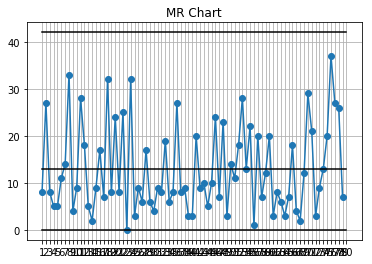

In [5]:
m=80
x=df['Temperature']

ucl_line = np.full(m,UCL_MR) 
lcl_line = np.full(m,LCL_MR) 
cl_line = np.full(m,CL_MR) 
plt.plot(MR,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('MR Chart')
plt.show()

# No points out of bounds.

### Individuals (I) Calculations

In [6]:
# Individuals control chart contant for n=2
E2=2.660

x=df['Temperature']
xbar=np.mean(x)
CL_x=xbar
UCL_x=xbar+E2*MRbar
LCL_x=xbar-E2*MRbar

print('CL_x=', CL_x)
print('UCL_x=', UCL_x)
print('LCL_x=', LCL_x)

CL_x= 951.3125
UCL_x= 985.5221202531645
LCL_x= 917.1028797468355


### Plot I Chart

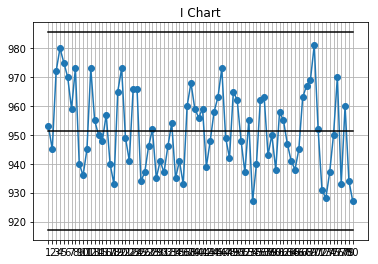

In [7]:
m=80
x=df['Temperature']

ucl_line = np.full(m,UCL_x)
lcl_line = np.full(m,LCL_x) 
cl_line = np.full(m,CL_x) 
plt.plot(x,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('I Chart')
plt.show()

# No points out of bounds.

## 2. Based on the data and the control charts, what is the estimate of the process mean?
ANS: The estimate of the process mean is mu=951.31

In [8]:
mu = xbar
print('mu=', mu)

mu= 951.3125


## 3. Based on the data and the control charts, what is the estimate of the process standard deviation?
ANS: The estimate of the process standard deviation is sigma=11.40

In [9]:
sigma = MRbar/d2
print('sigma=', sigma)

sigma= 11.401382529850077


# 4. Set up a tabular two-sided CUSUM chart for detecting a shift from  to  for this process, using standardized values h = 4.77 and k = 0.5. Does the process appear to be in- control? (Use the estimated values mu_0 of  and sigma_0).

ANS: See tabular two-sided CUSUM chart in the code below. No, the process does not appear to be in control because there are points out of bounds.

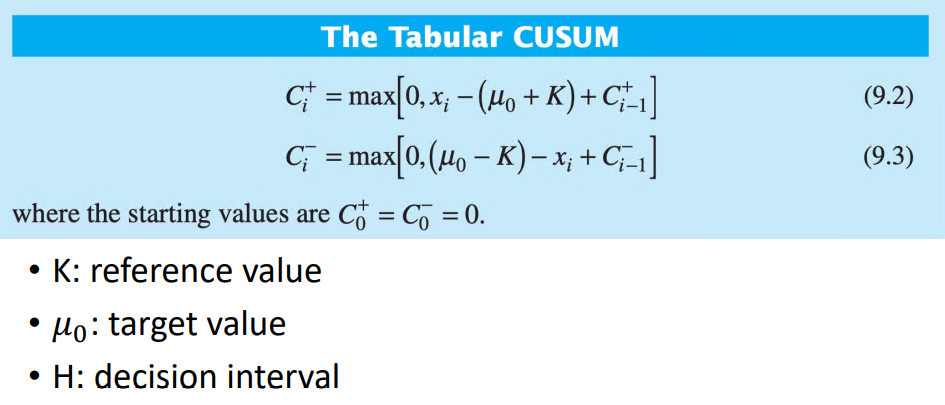

### Tabular Two-Sided CUSUM Chart Calculations

In [10]:
h=4.77
k=0.5

cplus = m*[None] # Initialize an array
cminus = m*[None] # Initialize an array

cplus[0]=0 # Starting value
cminus[0]=0 # Starting value

K = k*sigma
H = h*sigma

x=df['Temperature']
for i in range(m-1):
    cplus[i+1]=max(0, x[i+1]-(mu+K)+cplus[i])
    cminus[i+1]=max(0, (mu-K)-x[i+1]+cminus[i])

### Plot

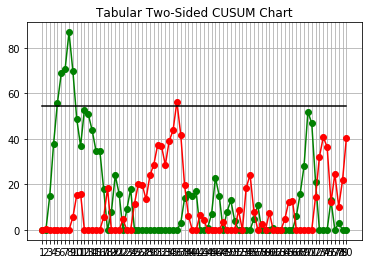

In [11]:
ucl_line = np.full(m,H) 
plt.plot(cplus, marker="o", color='g')
plt.plot(cminus, marker="o", color='r')
plt.plot(ucl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('Tabular Two-Sided CUSUM Chart')
plt.show()

# There are points out of bounds.

## # 5. Considering the first point lying outside the control limits, what is the estimate of the shifted mean (mu_1) for that sample?
ANS: The estimate of the shifted mean for the sample is mu_1 = 975.14

In [12]:
mu_1 = mu +(H/3)+K
print('mu_1=',mu_1)

mu_1= 975.1413894873866


# 6. Assume that the original value of the standard deviation (sigma_0) for the temperature reading is known to be 8. Develop CUSUM charts for mean and variance. What can we conclude about this process?
ANS: See CUSUM charts for mean and variance in the code below. We can conclude that the process is out of control because there are points out of bounds in both control charts.

### CUSUM Chart for Mean Calculations

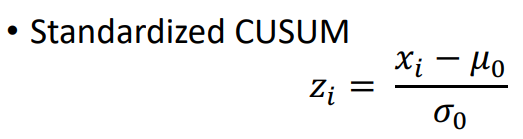

In [13]:
mu=951.3125 # From Q2
sigma=8

x=df['Temperature']

h=4.77
k=0.5

cplus = m*[None] # Initialize an array
cminus = m*[None] # Initialize an array

cplus[0]=0 # Starting value
cminus[0]=0 # Starting value

# Standardize
z_vals = []
for i in range(m):
    zi=(x[i]-mu)/sigma
    z_vals.append(zi)
df['z_vals']=z_vals
zi=z_vals

# Mean of standardized x values to get standardized mean
mu = np.mean(zi)

H = h*sigma
K= k*sigma

for i in range(m-1):
    cplus[i+1] = max(0, zi[i+1]-k+cplus[i])
    cminus[i+1]=max(0, -zi[i+1]-k+cminus[i])  

### Plot

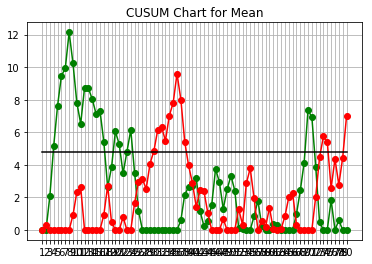

In [14]:
ucl_line = np.full(m,h) 
plt.plot(cplus, marker="o", color='g')
plt.plot(cminus, marker="o", color='r')
plt.plot(ucl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('CUSUM Chart for Mean')
plt.show()

### CUSUM Chart for Variance Calculations

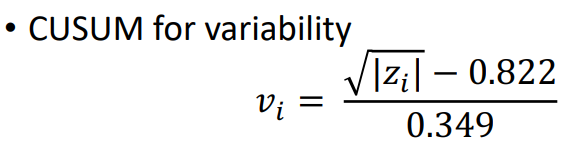

In [15]:
cplus = m*[None] # Initialize an array
cminus = m*[None] # Initialize an array

cplus[0]=0 # Starting value
cminus[0]=0 # Starting value

v_vals=[]
for i in range(m):
    y=abs(zi[i])
    v=(np.sqrt(y)-0.822)/0.349
    v_vals.append(v)
df['v_vals']=v_vals
vi=v_vals

for i in range(m-1):
    cplus[i+1] = max(0, vi[i+1]-k+cplus[i])
    cminus[i+1]=max(0, -vi[i+1]-k+cminus[i]) 

### Plot

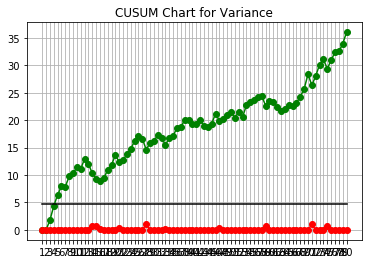

In [16]:
ucl_line = np.full(m,h) 
plt.plot(cplus, marker="o", color='g')
plt.plot(cminus, marker="o", color='r')
plt.plot(ucl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('CUSUM Chart for Variance')
plt.show()